In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
# Gerekli olan tüm her şeyi içe aktadrık.
# iki tane ekstra özellik aktardık onları da sonra konuşacağız.

In [2]:
df = pd.read_csv("3-customersatisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [6]:
df.tail()

,Customer Satisfaction,Incentive
95,2.055072,8.686851
96,0.864149,2.901486
97,-1.586101,0.786207
98,1.558528,5.447475
99,0.512504,4.356168


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Customer Satisfaction    0
Incentive                0
dtype: int64

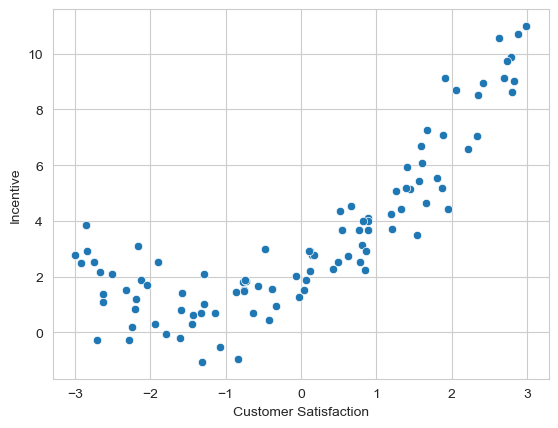

In [9]:
sns.set_style("whitegrid")
sns.scatterplot(x="Customer Satisfaction", y="Incentive", data=df)
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()
# Datamız Eğrisel bir dağılım göstermektedir.
# Yani bir polinom gibi davranmaktadır.

In [10]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(X_train, "\n")
print(X_test, "\n")
print(y_train, "\n")
print(y_test)
# Datamızı ayırıyoruz ve train test split ile eğitim ve test şeklinde ayırıyoruz.

    Customer Satisfaction
99               0.512504
3                2.625838
20              -0.865714
55              -1.145369
6                2.823460
..                    ...
28               1.191020
0               -1.282447
5               -1.311432
12               0.490521
72              -2.243889

[80 rows x 1 columns] 

    Customer Satisfaction
84               0.785942
36               0.142978
57              -1.282120
51               1.910583
46              -0.029488
78               1.541346
93               0.810527
14               0.072354
11               1.449716
59              -2.315315
61               0.664179
38               0.893237
21              -1.321916
90              -2.198427
8                1.210954
25              -2.121648
63              -2.914219
9               -2.631664
94               0.033198
97              -1.586101 

99     4.356168
3     10.563600
20     1.460525
55     0.702395
6      9.011908
        ...    
28     4.251864
0  

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Scaler modelimizi oluşturup değerlerimizi transform ediyoruz.

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Modelimizi transform edilmmiş datalarla eğitiyoruz.

LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)
print(y_pred)
# Modelimiz ile birlikte X_test verisi üzerinden tahminler yapıp kaydediyoruz.

[ 4.65663741  3.71913877  1.64121789  6.29646523  3.46766736  5.7580845
  4.692485    3.61616231  5.62448003  0.13472702  4.47909659  4.8130839
  1.58319087  0.30515983  5.27634309  0.41711005 -0.7385295  -0.32653914
  3.55906887  1.19798631]


In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Score: ", score)
# Hata ve başarı metriklerini hesaplayıp yazdırıyoruz. Şimdi bu değerleri inceleyelim
# Modelimizin R2 skoru çok kötü. Çünkü verilerimiz doğrusal değil.
# Fakat biz yine de doğrusal bir model oluşturmaya çalıştık.
# Bu nedenle modelimiz veri ile uyuşmadı ve veriden ilişkileri ve sonuçları iyice öğrenemedi.
# Yani underfitting olayı yaşandı.

MSE:  2.7171372775181077
MAE:  1.422433596621363
RMSE:  1.6483741315363172
Score:  0.27056525356222416


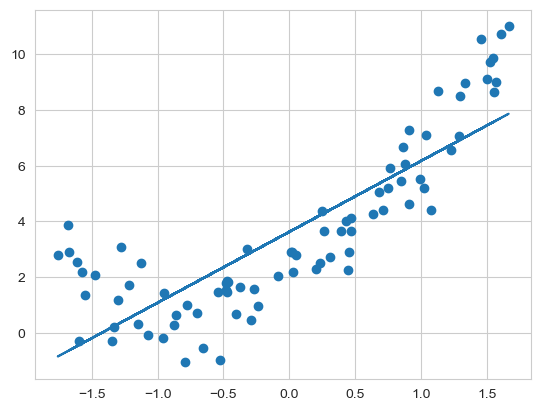

In [15]:
plt.scatter(x=X_train_scaled, y=y_train)
plt.plot(X_train_scaled, model.predict(X_train_scaled))
plt.show()
# Modelimize uygun best fit line'ı çizdiğimiz zaman verilerle uyuşmadığını rahatlıkla söyeleyebiliriz.

In [16]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# Verilerimiz doğrusal bir modelle uyuşmadığı için verilerimizi polinomsal verilere çevireceğiz.
# Burada Önce en yukarıda içe aktardığımız PolynomialFeatures class'ında bir obje oluşturuyoruz.
# Verdiğimiz parametreler degree; yani polinomun derecesi, include_bias ise intercept değerini alıp almayacağımızı belirler.
# Daha sonra bu objeyi kullarnak standartize edilmiş verilerimizi polinomsal verilere çeviriyoruz.
# Daha sonra bunu yine LinearRegression modeline vereceğiz ve o model bu polinomsal verilerle çalıştığı için polinomsal olacak.

In [17]:
print(X_train_poly)

[[ 1.00000000e+00  2.47633535e-01  6.13223675e-02]
 [ 1.00000000e+00  1.45565669e+00  2.11893639e+00]
 [ 1.00000000e+00 -5.40182671e-01  2.91797318e-01]
 [ 1.00000000e+00 -7.00039198e-01  4.90054879e-01]
 [ 1.00000000e+00  1.56862116e+00  2.46057233e+00]
 [ 1.00000000e+00  9.87568378e-01  9.75291302e-01]
 [ 1.00000000e+00  4.48640749e-01  2.01278522e-01]
 [ 1.00000000e+00  1.54377517e+00  2.38324178e+00]
 [ 1.00000000e+00  1.33219938e+00  1.77475518e+00]
 [ 1.00000000e+00 -4.80410926e-01  2.30794658e-01]
 [ 1.00000000e+00  3.92892957e-01  1.54364876e-01]
 [ 1.00000000e+00 -6.57456685e-01  4.32249293e-01]
 [ 1.00000000e+00  4.42663768e-01  1.95951211e-01]
 [ 1.00000000e+00 -8.72131603e-01  7.60613533e-01]
 [ 1.00000000e+00 -1.57257044e+00  2.47297780e+00]
 [ 1.00000000e+00 -4.70184630e-01  2.21073587e-01]
 [ 1.00000000e+00 -8.36083500e-02  6.99035619e-03]
 [ 1.00000000e+00 -1.67090265e+00  2.79191566e+00]
 [ 1.00000000e+00 -1.47554396e+00  2.17722999e+00]
 [ 1.00000000e+00 -2.66707249e-

In [18]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# Modelimizi tekrar, ama polinomsal verilerle eğitiyoruz.

LinearRegression()

In [19]:
y_pred_poly = poly_model.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)
# Modelin R2 skorunu inceledik ve önceki sonuca göre gayet iyi sonuç aldığımızı rahatlıkla söyleyebiliriz.

0.7685687698788557


In [20]:
print(poly_model.coef_)
print(poly_model.intercept_)
# Modelimizin coefficent ve intercept değerlerini inceliyoruz.

[0.         2.63871762 1.54959954]
2.07667642979328


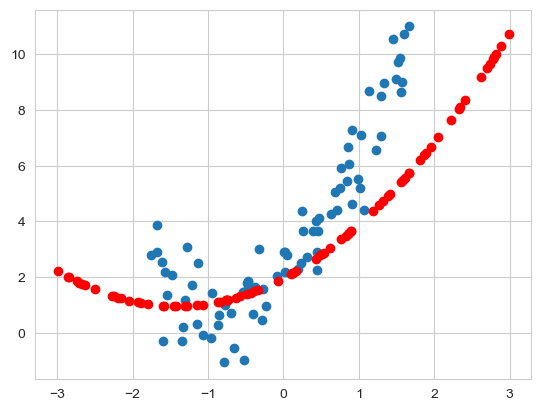

In [21]:
plt.scatter(x=X_train_scaled, y=y_train)
plt.scatter(X_train, poly_model.predict(X_train_poly), color="r")
plt.show()
# Modelimize en uygun best fit line'ı scatter ile çiziyoruz.
# Çünkü plot ile çizersek düz çizgi çizmeye çalışır, fakat biz eğrisel bir çizgi çizmeye çalışıyoruz.
# Peki modelimizin en yüksek performansı bu mu, daha üstüne çıkamaz mıyız?
# Bunu polinom derecesini değiştirerek öğrenebiliriz.
# Sonuçları karşılaştırırız ve en iyi sonuç hangisinde ise o polinom derecesini kullanırız.
# Fakat dereceleri değiştirirken dikkatli olmamız lazım çünkü overfitting riskini arttırabiliriz.

In [22]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# Modelimizi 3.dereceden polinomsal verilerle tekrar eğitiyoruz.

LinearRegression()

In [23]:
y_pred_poly = poly_model.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)
print(poly_model.coef_)
print(poly_model.intercept_)
# Skorumuzu inceliyoruz ve önceki değere göre çok ama çok küçük azaldığını görebiliyoruz.
# Bu nedenle en iyi derecenin 2 olduğuna kanaat getiriyoruz ve derecemiz 2 olarak kalıyor.
# Skorlarımızın çok yüksek olmaması modelimizin kötü olduğu anlamına gelmez.
# Bu skorlara göre modeli en fazla %76 oranında açıklayabiliyoruz.

0.7573443621401051
[ 0.          3.02641355  1.52692924 -0.21259075]
2.0872858398016136


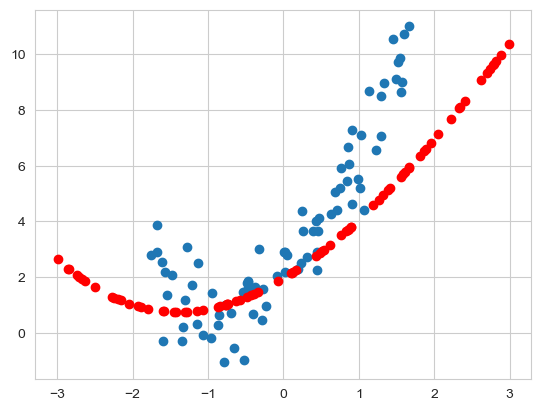

In [24]:
plt.scatter(x=X_train_scaled, y=y_train)
plt.scatter(X_train, poly_model.predict(X_train_poly), color="r")
plt.show()
# Best fit line grafikleri arasında çok bir fark yok gibi ama skorlarımızda çok küçük bir fark var.

In [25]:
new_df = pd.read_csv("3-newdatas.csv")
# Şimdi yeni bir data getirdik. Buradaki tek feature'a göre prim değerlerini tahmin etmeye çalışacağız.

In [26]:
print(new_df.head())
print(new_df.info())
print(new_df.isnull().sum())
# Yeni gelen veriyi inceliyoruz.

          0
0 -3.000000
1 -2.969849
2 -2.939698
3 -2.909548
4 -2.879397
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None
0    0
dtype: int64


In [27]:
new_df.rename(columns={"0": "Customer Satisfaction"}, inplace=True)
# kolonu isimlendiriyoruz.

In [28]:
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [29]:
X_new = new_df[["Customer Satisfaction"]]
print(X_new)
# Veriyi X_new şeklinde kaydediyoruz.

     Customer Satisfaction
0                -3.000000
1                -2.969849
2                -2.939698
3                -2.909548
4                -2.879397
..                     ...
195               2.879397
196               2.909548
197               2.939698
198               2.969849
199               3.000000

[200 rows x 1 columns]


In [30]:
X_new_scaled = scaler.transform(X_new)
X_new_poly = poly.transform(X_new_scaled)
y_new = poly_model.predict(X_new_poly)
# Yeni gelen veriyi tahmin ederken önce scaler ile transform ederiz.
# Ama sadece transform ederiz ki modelin sahip olduğu parametreler ile öçleklensin ve modelimizin tahminleri düzgün olsun.
# Daha sonra verilerimizi polinom hale getirmek için başta oluştuduğumuz poly modeli ile transform ediyoruz.
# Ama yine sadece transform ediyoruz. Çünkü verilerin aynı şekilde polinomlaştırılması gerekir.
# Daha sonra verilerimizi tahmin ediyoruz.

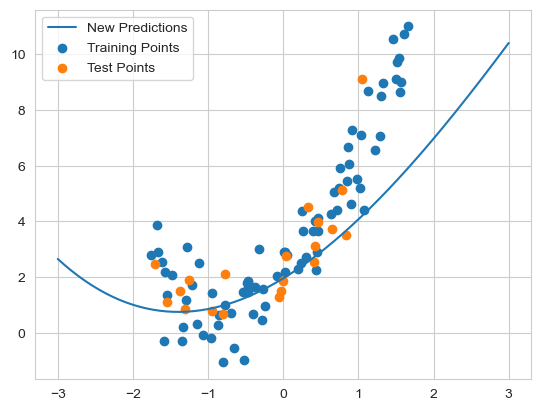

In [31]:
plt.plot(X_new, y_new, label="New Predictions")
plt.scatter(X_train_scaled, y_train, label="Training Points")
plt.scatter(X_test_scaled, y_test, label="Test Points")
plt.legend()
plt.show()
# Burada önce Veriye göre tahinlerimizin çizgisini çiziyoruz.
# Daha sonra scatterlar ile önce eğitim verilerini ve test verilerini gösteriyoruz.
# Görüldüğü gibi modelimizin best fit line'ı, eğitildiği veriler ve test edildiği veriler gözükmektedir.

In [32]:
#pipline
def poly_regression(degree):
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ("standart_scaler", scaler),
        ("poly_featrues", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 Score:", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train_scaled, y_train, label="Training Points")
    plt.scatter(X_test_scaled, y_test, label="Test Points")
    plt.legend()
    plt.show()

# pipeline ile modellerimizi çok pratik şekilde oluşturabilir ve sonuçarı karşılaştırabiliriz.
# Önce bir fonksiyon oluşturuyoruz ve daha sonra derece parametresini veriyoruz.
# Daha sonra modellerimizi objeler ile oluşturuyoruz ve polynom modeline parametre olarak girilen derece değerini veriyoruz.
# Daha sonra modellerimizi pipeline sınıfına veriyoruz ve pipeline modelimizi oluşturuyoruz.
# Daha sonra tüm modellerimizi pipeline.fit ile eğitiyoruz. Bu aşamada veriler hem ölçeklenir, hem polinomlaştırılır ve model eğitilir.
# Daha sonra score metodunu kullanarak test verilerini parametre olarak vererek R2 skorlarımızı hesaplıyoruz.
# Daha sonra yeni bir veri üzerinden her modelle tahmin yapıyoruz.
# Tahminlerin best fit line'ını, eğitim ve test verilerini görselleştiriyoruz.
# Böylece her modelin sonuçlarını karşılaştırabilir ve en iyisini seçebiliriz.

R2 Score: 0.2705652535622244


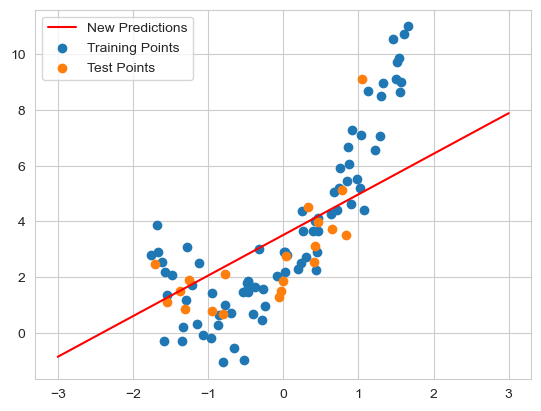

R2 Score: 0.7685687698788557


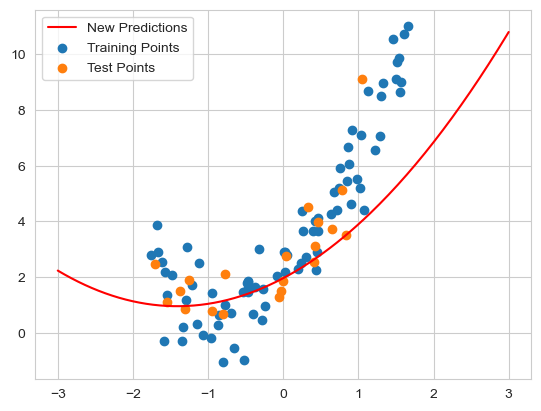

R2 Score: 0.7573443621401051


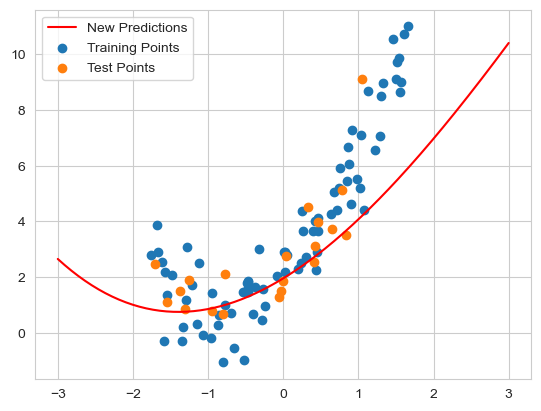

R2 Score: 0.7355034443260415


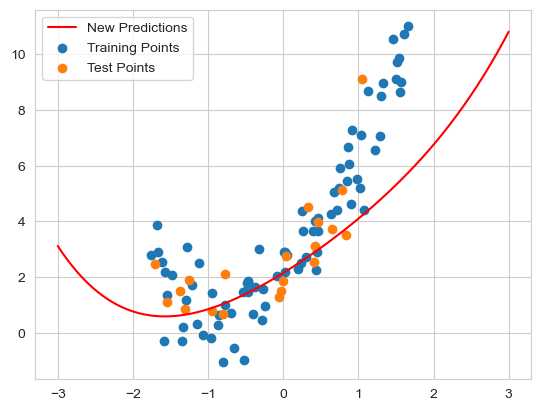

R2 Score: 0.7351244165095396


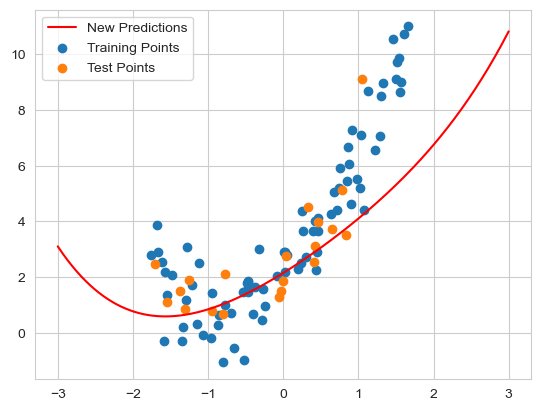

R2 Score: 0.7343590482133431


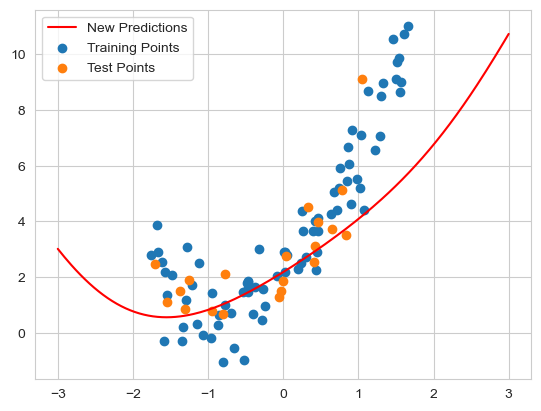

R2 Score: 0.7347819263549452


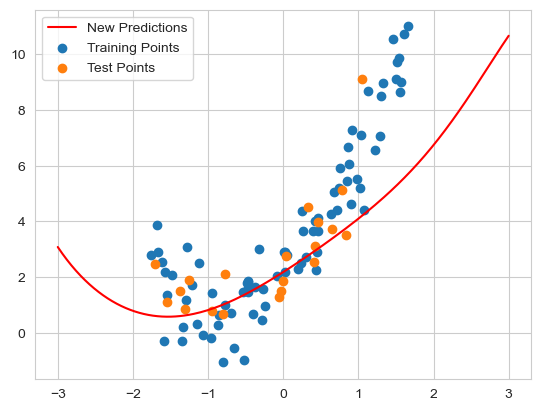

R2 Score: 0.7411422099998395


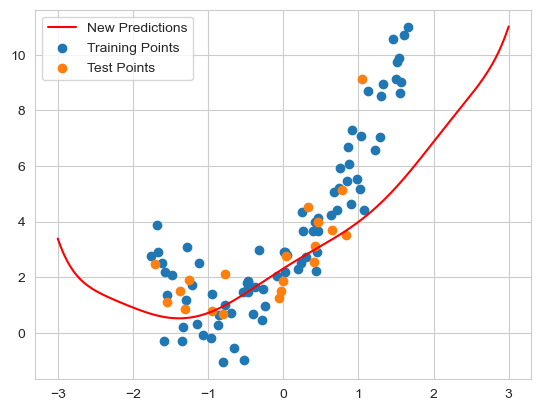

R2 Score: 0.7310763879815934


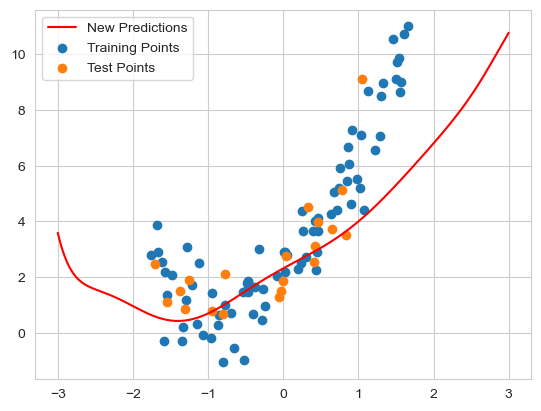

R2 Score: 0.7280578621232868


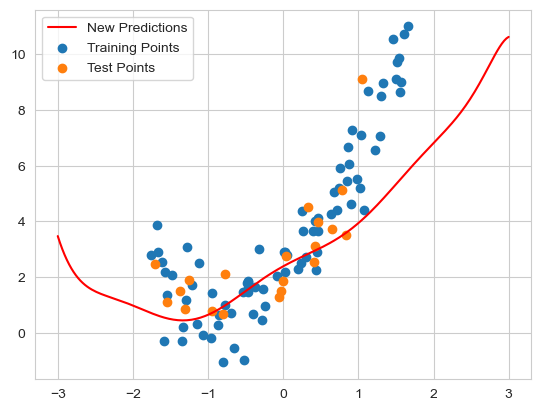

In [33]:
degrees = list(range(1,11))
for i in degrees:
    poly_regression(i)
# Derece listesi içinde for döngüsü ile dönerek sonuçları her derece için görüyoruz.
# Ve derece arttıkça overfitting olduğunu ve best fit line'ın kıvrıldığını görebiliyoruz.